Una importante firma de consulturía digital 'Data-Driven Marketing' le ha contratado a usted para realizar un forecast (predicción) de las ventas futuras de unos productos segun las siguientes variables:

* TV promotion budget (in million)
* Social Media promotion budget (in million)
* Radio promotion budget (in million)
* Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
* Sales (in million)

## Ejercicios

In [55]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1. Cargue los datos

In [34]:
df = pd.read_csv('Dummy Data HSS.csv')
df.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


2. Describa el tipo de variables que se encuentran en el dataset

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


3. Con el metodo describe, genere estadisticas descriptivas y mencionelas

In [36]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


4. Existen datos nulos/Na's, repetidos?

In [37]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [38]:
df.duplicated().sum()

0

5. Existen variables categóricas? De ser así, cuantas categorias existen y cunetelas (pista: value_counts)

In [39]:
df["Influencer"].value_counts()

Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: Influencer, dtype: int64

6. Crea un diagrama de cajas y bigotes cuya variable x sea Influencer y y sea Sales. Realiza un breve analisis de lo que encuentras

<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

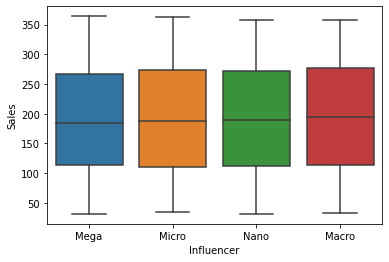

In [40]:
sns.boxplot(x = "Influencer", y = "Sales", data = df)

7. Cree un histograma para cada variable numerica

<AxesSubplot:xlabel='Sales', ylabel='Count'>

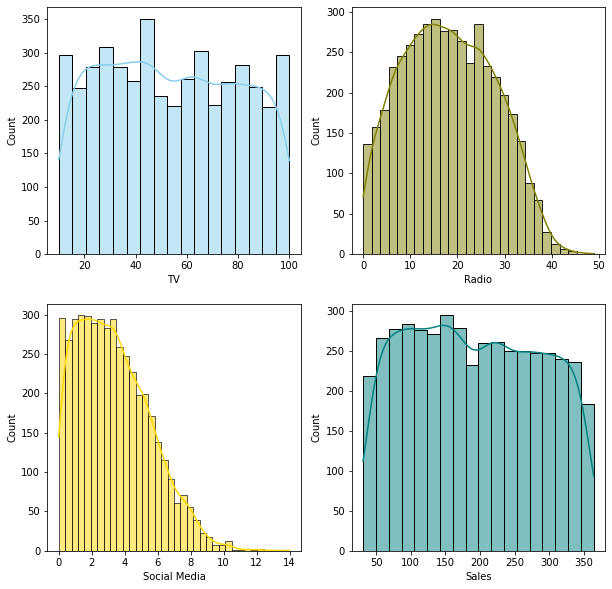

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df, x="TV", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Radio", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Social Media", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Sales", kde=True, color="teal", ax=axs[1, 1])

8. Genere un pairplot y describa brevemente como se compaortan las variables

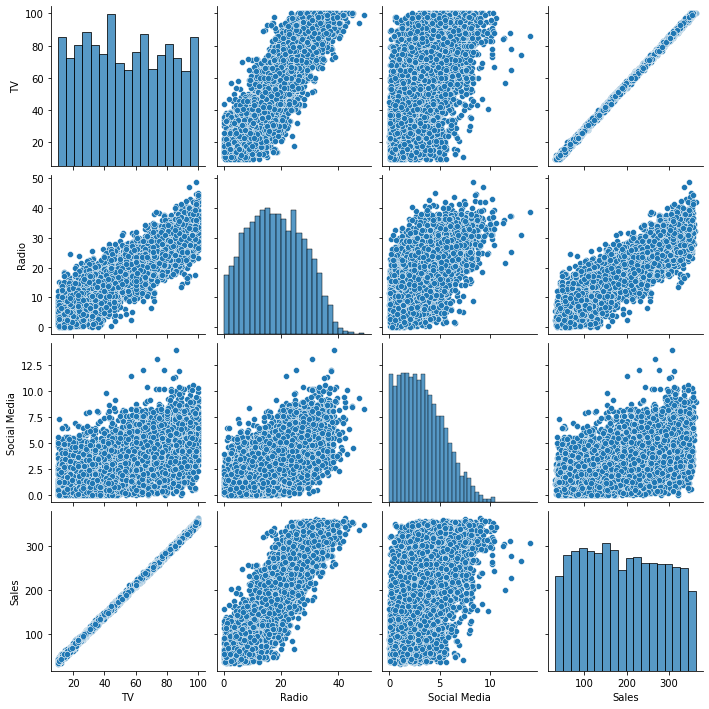

In [42]:
sns.pairplot(df, vars = ['TV', 'Radio', 'Social Media', 'Sales'])

9. Genere un heatmap de correlacion y diga cuales de las variables estan mas y menos correlacionadas.

<AxesSubplot:>

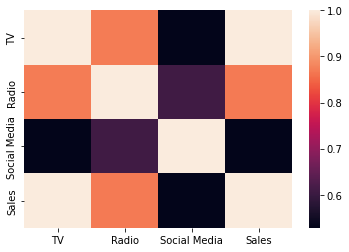

In [43]:
sns.heatmap(df.corr())

10. Usando el metodo [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de sklearn haga un 'hold-out' separando los datos en 2 conjuntos de train y test (80/20 efectivamente:)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
x = df[['TV', 'Radio','Social Media','Influencer']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

11. Trate de entrenar un modelo lineal de sklearn ([LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) cuyas X sean todas las variables menos Sales, y Y sea solo Sales. Qué error da?

In [46]:
lm = LinearRegression()
lm.fit(X_train,y_train)

ValueError: could not convert string to float: 'Macro'

11. Como se observo en el punto atenrior, la variable Influencer no es numerica (es categorica) por lo que debemos realizarle una transformacion especial para poder utilizarla en nuestro modelo. A esto se le conoce como variables dummies

Crea variables dummy para la columna Influencer. Pista: puedes usar el metodo get_dummies() de pandas. Puedes encontrar mas info [aqui](https://www.sharpsightlabs.com/blog/pandas-get-dummies/)

In [51]:
df_dummy = pd.get_dummies(df, columns = ['Influencer'])
df_dummy = df_dummy.dropna()

In [52]:
df_dummy.isnull().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

12. Ahora intenta entrenar de nuevo (esta vez si te deberia funcionar)

In [53]:
x = df_dummy[['TV', 'Radio','Social Media','Influencer_Macro','Influencer_Mega','Influencer_Micro','Influencer_Nano']]
y = df_dummy['Sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

13. Evalua el modelo con sus distintas metricas (pista, use el metodo predict). Que puedes decir de ellas? 

In [56]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.3821492250848078
MSE: 8.825532793598711
RMSE: 2.970779829202883


14. Imprime los coeficientes e interpretalos segun la variable dependiente y (Sales).

In [58]:
coefficients = pd.DataFrame(lm.coef_,x.columns)
coefficients.columns = ['coefficients']
coefficients.sort_values(by="coefficients",ascending=False)

,coefficients
TV,3.562888
Influencer_Mega,0.118002
Influencer_Macro,0.036005
Radio,-0.001414
Social Media,-0.002206
Influencer_Micro,-0.036728
Influencer_Nano,-0.117279


# Solo con TV

In [60]:
df = df.dropna()
x_2 = df[['TV']]
y_2 = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2)
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.3883334522482325
MSE: 8.960341842748297
RMSE: 2.99338300969794


In [63]:
coefficients = pd.DataFrame(lm.coef_,x_2.columns)
coefficients.columns = ['coefficients']
coefficients.sort_values(by="coefficients",ascending=False)

,coefficients
TV,3.561364
